In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(rc={'figure.figsize':(20,10)})

Se nos pide predecir la variable MTO_PIA. Pero, ¿que es esta variable?. Viendo dentro de la metadata (data sobre la data) observamos que esta variable

In [3]:
meta_data_df=pd.read_csv("data/metaData.csv")

In [4]:
pd.set_option('display.max_colwidth', None)
meta_data_df.loc[meta_data_df["Variable"] == "MTO_PIA"]

,Variable,Descripción,Tipo de dato,Tamaño,Recurso relacionado,Información Adicional
35,MTO_PIA,Monto asignado de Presupuesto Institucional de Apertura.,Numérico,10,NaN,EJEMPLO: 12345.67


Se nos pide predecir el presupuesto Institucional de Apertura dada las demas variables. ¿Que variables influencian sobre el presupuesto inicial?.

In [5]:
meta_data_df[35:74]

,Variable,Descripción,Tipo de dato,Tamaño,Recurso relacionado,Información Adicional
35,MTO_PIA,Monto asignado de Presupuesto Institucional de Apertura.,Numérico,10,NaN,EJEMPLO: 12345.67
36,MTO_MODIFICACIONES,"Monto de cambios en los créditos presupuestarios, tanto en su cuantía como en el nivel Institucional (créditos suplementarios y transferencias de partidas) y, en su caso, a nivel funcional programático (habilitaciones y anulaciones).",Numérico,10,NaN,EJEMPLO: 12345.67
37,MTO_PIM,Monto de Presupuesto Institucional Modificado.,Numérico,10,NaN,EJEMPLO: 12345.67
38,MTO_CERTIFICADO,Monto del presupuesto certificado,Numérico,10,NaN,EJEMPLO: 12345.67 - valor acumulado del certificacion que se realiza de manera permanente
39,MTO_COMPRO_ANUAL,"Monto del presupuesto utilizado en fase Compromiso anual, al nivel mostrado.",Numérico,10,NaN,EJEMPLO: 12345.67
40,MTO_AT_COMP_01,"Monto del presupuesto utilizado en fase Compromiso mensual, al mes de enero",Numérico,10,NaN,EJEMPLO: 12345.67
41,MTO_AT_COMP_02,"Monto del presupuesto utilizado en fase Compromiso mensual, al mes de febrero",Numérico,10,NaN,EJEMPLO: 12345.67
42,MTO_AT_COMP_03,"Monto del presupuesto utilizado en fase Compromiso mensual, al mes de marzo",Numérico,10,NaN,EJEMPLO: 12345.67
43,MTO_AT_COMP_04,"Monto del presupuesto utilizado en fase Compromiso mensual, al mes de abril",Numérico,10,NaN,EJEMPLO: 12345.67
44,MTO_AT_COMP_05,"Monto del presupuesto utilizado en fase Compromiso mensual, al mes de mayo",Numérico,10,NaN,EJEMPLO: 12345.67


In [6]:
train_data_df=pd.read_csv("data/train.csv")

In [7]:
train_data_df=pd.read_csv("data/train.csv")
print(train_data_df["SECTOR"].unique())

['40. DESARROLLO E INCLUSION SOCIAL']


In [8]:

print(train_data_df["PLIEGO"].unique())

['040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL']


In [9]:

print(train_data_df["UNIDAD_EJECUTORA"].unique())

['008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION  PARA LA INCLUSION SOCIAL - PAIS']


In [10]:
print(train_data_df["SEC_EJEC"].unique())

[1674]


¿Que valores pueden tomar los datos?

In [11]:
print(train_data_df["PROGRAMA_PPTAL"].unique())

['9001.ACCIONES CENTRALES'
 '9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESULTAN EN PRODUCTOS'
 '0068.REDUCCION DE VULNERABILIDAD Y ATENCION DE EMERGENCIAS POR DESASTRES']


In [12]:
print(train_data_df["TIPO_PROD_PROY"].unique())

['3.PRODUCTO' '2.PROYECTO']


In [13]:
print(train_data_df["PRODUCTO_PROYECTO"].unique())

['3999999.SIN PRODUCTO'
 '3000739.POBLACION CON PRACTICAS SEGURAS PARA LA RESILIENCIA'
 '2176877.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL C.P. CCANCCOLLY CRUCERO-CARABAYA-PUNO'
 '2157530.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL C.P. CENTRAL CCALLA SAN JUAN DE SALINAS-AZANGARO-PUNO'
 '2176885.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL C.P. MARNO - LAMPA - LAMPA - PUNO'
 '2624607.CREACION DEL SERVICIO DEL ESTADO EN POBLACIONES RURALES CON LA PLATAFORMA DE SERVICIOS - TAMBO EN EL CENTRO POBLADO UROS TITINO DEL DISTRITO DE HUATA - PROVINCIA DE PUNO - DEPARTAMENTO DE PUNO'
 '2176887.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL SECTOR AMSTA HUATASANI, TILALI, MOHO, PUNO'
 '2001621.ESTUDIOS DE PRE-INVERSION']


In [14]:
print(train_data_df["TIPO_ACT_OBRA_ACCINV"].unique())

['5.ACTIVIDAD' '6.ACCION DE INVERSION']


In [15]:
print(train_data_df["ACT_OBRA_ACCINV"].unique())

['5000003.GESTION ADMINISTRATIVA'
 '5002358.GESTION DE LAS PRESTACIONES SOCIALES'
 '5001253.TRANSFERENCIA DE RECURSOS PARA LA EJECUCION DE PROYECTOS DE INVERSION'
 '5000005.GESTION DE RECURSOS HUMANOS'
 '5000002.CONDUCCION Y ORIENTACION SUPERIOR'
 '5000004.ASESORAMIENTO TECNICO Y JURIDICO'
 '5000001.PLANEAMIENTO Y PRESUPUESTO'
 '5005582.IMPLEMENTACION DE MEDIDAS DE PROTECCION ANTE BAJAS TEMPERATURAS'
 '6000001.EXPEDIENTE TECNICO' '6000032.ESTUDIOS DE PRE - INVERSION']


In [16]:
print(train_data_df["DIVISION_FN"].unique())

['006.GESTION' '051.ASISTENCIA SOCIAL' '004.PLANEAMIENTO GUBERNAMENTAL'
 '016.GESTION DE RIESGOS Y EMERGENCIAS']


In [17]:
print(train_data_df["META"].unique())

[ 6 20  4  1  7 19 11 10  5 17  8 16 23 15 22 25  3 18 12 13 14 27 21 26
  9 24  2]


In [18]:
print(train_data_df["FINALIDAD"].unique())

['0000888.GESTION ADMINISTRATIVA'
 '0235454.MANTENIMIENTO Y OPERATIVIDAD DE LAS PLATAFORMAS DE SERVICIOS FIJOS (TAMBOS)'
 '0417290.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL CENTRO POBLADO CHEJACHE, DISTRITO DE SAMAN - AZANGARO - PUNO'
 '0367091.CREACION DEL CENTRO DE SERVICIOS - TAMBO EN EL CP EL ARABE, DISTRITO DE JOSE CRESPO Y CASTILLO, LEONCIO PRADO, HUANUCO'
 '0072183.ACCIONES DE PRENSA, IMAGEN Y PROTOCOLO'
 '0235455.MONITOREAR Y SUPERVISAR LA IMPLEMENTACION DE LAS PLATAFORMAS DE SERVICIOS'
 '0235453.ARTICULAR LA PRESTACION DE SERVICIOS Y ACTIVIDADES A TRAVES DE LAS PLATAFORMAS DE SERVICIOS'
 '0367089.CREACION DEL CENTRO DE SERVICIOS - TAMBO EN EL CENTRO POBLADO DE PUERTO AUXILIO, DISTRITO DE LAGUNAS, ALTO AMAZONAS, LORETO'
 '0053571.GESTION DE RECURSOS HUMANOS'
 '0222334.COORDINACION PARA LA OPERACION Y MANTENIMIENTO DE LAS PLATAFORMAS ITINERANTES DE ACCION SOCIAL - PIAS, EN EL MARCO DE LA ESTRATEGIA DE ACCION SOCIAL CON SOSTENIBILIDAD - EASS'
 '0000017.ACCI

In [19]:
print(train_data_df["UNIDAD_MEDIDA"].unique())

['00248.REPORTE' '00043.ESTABLECIMIENTO' '00060.INFORME' '00096.PROYECTO'
 '00152.USUARIO' '00086.PERSONA' '00054.EXPEDIENTE TECNICO' '00001.ACCION'
 '00213.ESTUDIO DE PREINVERSION']


In [20]:
print(train_data_df["CANT_META_ANUAL"].unique())

[0]


In [21]:
print(train_data_df["CANT_META_SEM"].unique())

[    6    16     2    63    17    36    32    61    10    12     4     0
    18    51     1    26    41    20    19    38     9 40890 11500]


In [22]:
print(train_data_df["AVAN_FISICO_ANUAL"].unique())

[0]


In [23]:
print(train_data_df["AVAN_FISICO_SEM"].unique())

[    6    16     2    63    17    36    32    61    10    12     4     0
    19    51     1    26    41    20    40     9 61303 12429]


In [24]:
print(train_data_df["SEC_FUNC"].unique())

[ 9 23 41  4 10 56 48 13 44  8 43 20 45 19 60 52 59 62  6 78 15 42 29 49
 16 53 51 57 25 64 24 63 50 47 46 61 18 55 22 11 12 14 40 21 58 17  7 67
  5 28 54 38  3 27 65 26  2  1 30 70 39 35 66 80 33 31 72 74 71 77 32 79
 36 76 68 69 34 75 37]


In [25]:
print(train_data_df["DEPARTAMENTO"].unique())

['AYACUCHO' 'TACNA' 'AMAZONAS' 'LIMA' 'MADRE DE DIOS' 'CUSCO'
 'HUANCAVELICA' 'AREQUIPA' 'APURIMAC' 'PIURA' 'PASCO' 'PUNO' 'LA LIBERTAD'
 'ANCASH' 'JUNIN' 'HUANUCO' 'LAMBAYEQUE' 'MOQUEGUA' 'UCAYALI' 'CAJAMARCA'
 'SAN MARTIN' 'LORETO']


In [26]:
print(train_data_df["PROVINCIA"].unique())

['HUAMANGA' 'TACNA' 'CHACHAPOYAS' 'LIMA' 'LUCANAS' 'TAMBOPATA' 'CUSCO'
 'HUANCAVELICA' 'AREQUIPA' 'ABANCAY' 'PIURA' 'PASCO' 'PUNO' 'TRUJILLO'
 'HUARAZ' 'AZANGARO' 'HUANCAYO' 'LEONCIO PRADO' 'CHICLAYO'
 'MARISCAL NIETO' 'CORONEL PORTIL' 'HUANUCO' 'CAJAMARCA' 'MOYOBAMBA'
 'MAYNAS' 'ALTO AMAZONAS' 'CAJATAMBO' 'SANCHEZ CARRIO' 'MARANON'
 'CARABAYA' 'LORETO' 'PUTUMAYO' 'REQUENA' 'UCAYALI' 'PUERTO INCA' 'LAMPA'
 'HUAMALIES' 'SATIPO' 'MOHO' 'DATEM DEL MARA' 'OXAPAMPA']


In [27]:
print(train_data_df["DISTRITO"].unique())

['MULTIDISTRITAL' 'LIMA' 'AYACUCHO' 'TRUJILLO' 'SAMAN' 'JOSE CRESPO Y '
 'HUANCAYO' 'HUANUCO' 'PUQUIO' 'LAGUNAS' 'GORGOR' 'MARCABAL' 'CHOLON'
 'CRUCERO' 'ROSA PANDURO' 'JENARO HERRERA' 'PADRE MARQUEZ'
 'CODO DEL POZUZ' 'SARAYACU' 'SAN JUAN DE SA' 'LAMPA' 'MONZON' 'PANGOA'
 'HUATA' 'YAGUAS' 'NAPO' 'TILALI' 'MORONA' 'CONSTITUCION']


In [28]:
print(train_data_df["UBIGEO"].unique())

[ 50199 230199  10199 150101  50699 170199  80199  90199  40199  30199
 200199  50101 190199 210199 130101  20199 210210 120199 100604 130199
 140199 120101 180199 250199 100101  60199  50601 220199 160199 100199
 160206 150303 150199 130905 100702 210306 160399 160802 160510 160603
 100902 160605 210213 210701 100507 120606 210108 160804 160107 210904
 160704 190308]


In [29]:
print(train_data_df["FUENTE_FINANC"].unique())

['1.RECURSOS ORDINARIOS']


In [30]:
print(train_data_df["RUBRO"].unique())

['00.RECURSOS ORDINARIOS']


In [31]:
print(train_data_df["CATEGORIA_GASTO"].unique())

['5.GASTOS CORRIENTES' '6.GASTOS DE CAPITAL']


In [32]:
print(train_data_df["TIPO_TRANSACCION"].unique())

['2.GASTOS PRESUPUESTARIOS']


In [33]:
print(train_data_df["GENERICA"].unique())

['3.BIENES Y SERVICIOS' '5.OTROS GASTOS'
 '6.ADQUISICION DE ACTIVOS NO FINANCIEROS']


In [34]:
print(train_data_df["SUBGENERICA"].unique())

['2.CONTRATACION DE SERVICIOS' '1.COMPRA DE BIENES'
 '2.TRANSFERENCIAS A INSTITUCIONES SIN FINES DE LUCRO'
 '3.ADQUISICION DE VEHICULOS, MAQUINARIAS Y OTROS'
 '4.PAGO DE IMPUESTOS,  DERECHOS ADMINISTRATIVOS Y MULTAS GUBERNAMENTALES'
 '8.OTROS GASTOS DE ACTIVOS NO FINANCIEROS'
 '5.PAGO DE SENTENCIAS JUDICIALES, LAUDOS ARBITRALES Y SIMILARES']


In [35]:
print(train_data_df["SUBGENERICA_DET"].unique())

['6.SERVICIOS ADMINISTRATIVOS, FINANCIEROS Y DE SEGUROS' '1.VIAJES'
 '8.CONTRATO ADMINISTRATIVO DE SERVICIOS'
 '7.SERVICIOS PROFESIONALES Y TECNICOS'
 '3.COMBUSTIBLES, CARBURANTES, LUBRICANTES Y AFINES'
 '5.MATERIALES Y  UTILES'
 '2.SERVICIOS BASICOS, COMUNICACIONES, PUBLICIDAD Y DIFUSION'
 '1.ALIMENTOS Y BEBIDAS'
 '4.SERVICIO DE MANTENIMIENTO, ACONDICIONAMIENTO Y  REPARACIONES'
 '2.TRANSFERENCIAS DE CAPITAL A INSTITUCIONES SIN FINES DE LUCRO.'
 '5.ALQUILERES DE MUEBLES E INMUEBLES' '2.VESTUARIOS Y TEXTILES'
 '99.COMPRA DE OTROS BIENES' '8.SUMINISTROS MEDICOS' '7.ENSERES'
 '9.LOCACIÓN DE SERVICIOS RELACIONADAS AL ROL DE LA ENTIDAD'
 '6.REPUESTOS Y ACCESORIOS'
 '3.SERVICIOS DE LIMPIEZA, SEGURIDAD Y VIGILANCIA'
 '2.ADQUISICION DE MAQUINARIAS, EQUIPO Y MOBILIARIO'
 '1.AL GOBIERNO NACIONAL' '1.OTROS GASTOS DE ACTIVOS NO FINANCIEROS'
 '1.PAGO DE SENTENCIAS JUDICIALES Y LAUDOS ARBITRALES'
 '3.AL GOBIERNO LOCAL' '11.SUMINISTROS PARA MANTENIMIENTO Y REPARACION']


In [36]:
print(train_data_df["ESPECIFICA"].unique())

['3.SEGUROS' '2.VIAJES DOMESTICOS'
 '1.CONTRATO ADMINISTRATIVO DE SERVICIOS' '11.OTROS SERVICIOS'
 '1.COMBUSTIBLES, CARBURANTES, LUBRICANTES Y AFINES'
 '3.ASEO, LIMPIEZA Y COCINA'
 '1.SERVICIOS DE ENERGIA ELECTRICA, AGUA Y GAS' '1.ALIMENTOS Y BEBIDAS'
 '2.DE EDIFICACIONES, OFICINAS Y ESTRUCTURAS' '5.DE VEHICULOS'
 '1.TRANSFERENCIAS CAPITAL' '1.ALQUILERES DE MUEBLES E INMUEBLES'
 '2.SERVICIOS DE TELEFONIA E INTERNET'
 '1.VESTUARIO, ZAPATERIA Y ACCESORIOS, TALABARTERIA Y MATERIALES TEXTILES'
 '1.COMPRA DE OTROS BIENES' '1.PRODUCTOS FARMACEUTICOS' '1.ENSERES'
 '1.LOCACIÓN DE SERVICIOS RELACIONADAS AL ROL DE LA ENTIDAD'
 '7.DE MAQUINARIAS Y EQUIPOS' '1.DE OFICINA'
 '3.SERVICIOS DE MENSAJERIA, TELECOMUNICACIONES Y OTROS AFINES'
 '1.REPUESTOS Y ACCESORIOS' '1.SERVICIOS ADMINISTRATIVOS'
 '5.PRACTICANTES, SECIGRISTAS Y SIMILARES'
 '4.ELECTRICIDAD, ILUMINACION Y ELECTRONICA'
 '2.MATERIAL,INSUMOS,INSTRUMENTAL Y ACCESORIOS MEDICOS,QUIRURGICOS, ODONTOLOGICOS Y DE LABORATORIO'
 '2.SERVICIOS FINANCI

In [37]:
print(train_data_df["ESPECIFICA_DET"].unique())

['99.OTROS SEGUROS DE  BIENES MUEBLES E INMUEBLES'
 '2.VIATICOS Y ASIGNACIONES POR COMISION DE SERVICIO'
 '10.OTROS BONOS EXTRAORDINARIOS' '2.SEGURO DE VEHICULOS'
 '99.SERVICIOS DIVERSOS' '4.AGUINALDOS DE C.A.S.'
 '3.LUBRICANTES, GRASAS Y AFINES' '99.OTROS GASTOS'
 '1.ASEO, LIMPIEZA Y TOCADOR' '1.COMBUSTIBLES Y CARBURANTES'
 '2.SERVICIO DE AGUA Y DESAGUE'
 '1.ALIMENTOS Y BEBIDAS PARA CONSUMO HUMANO'
 '2.TRANSPORTE Y TRASLADO DE CARGA, BIENES Y MATERIALES'
 '4.OTROS SEGUROS PERSONALES'
 '1.SERVICIO DE SUMINISTRO DE ENERGIA ELECTRICA'
 '1.DE EDIFICACIONES, OFICINAS Y ESTRUCTURAS' '1.DE VEHICULOS' '2.GASES'
 '99.A OTRAS ORGANIZACIONES' '1.DE EDIFICIOS Y ESTRUCTURAS'
 '3.SERVICIO DE INTERNET' '1.VESTUARIO, ACCESORIOS Y PRENDAS DIVERSAS'
 '99.OTROS BIENES' '3.SEGURO OBLIGATORIO ACCIDENTES DE TRANSITO (SOAT)'
 '99.OTROS PRODUCTOS SIMILARES' '1.ENSERES'
 '2.CONTRIBUCIONES A ESSALUD DE C.A.S.' '1.SERVICIO DE TELEFONIA MOVIL'
 '5.VACACIONES TRUNCAS DE C.A.S.'
 '1.LOCACIÓN DE SERVICIOS REALIZADO

¿Cual es la distribución de los gastos?

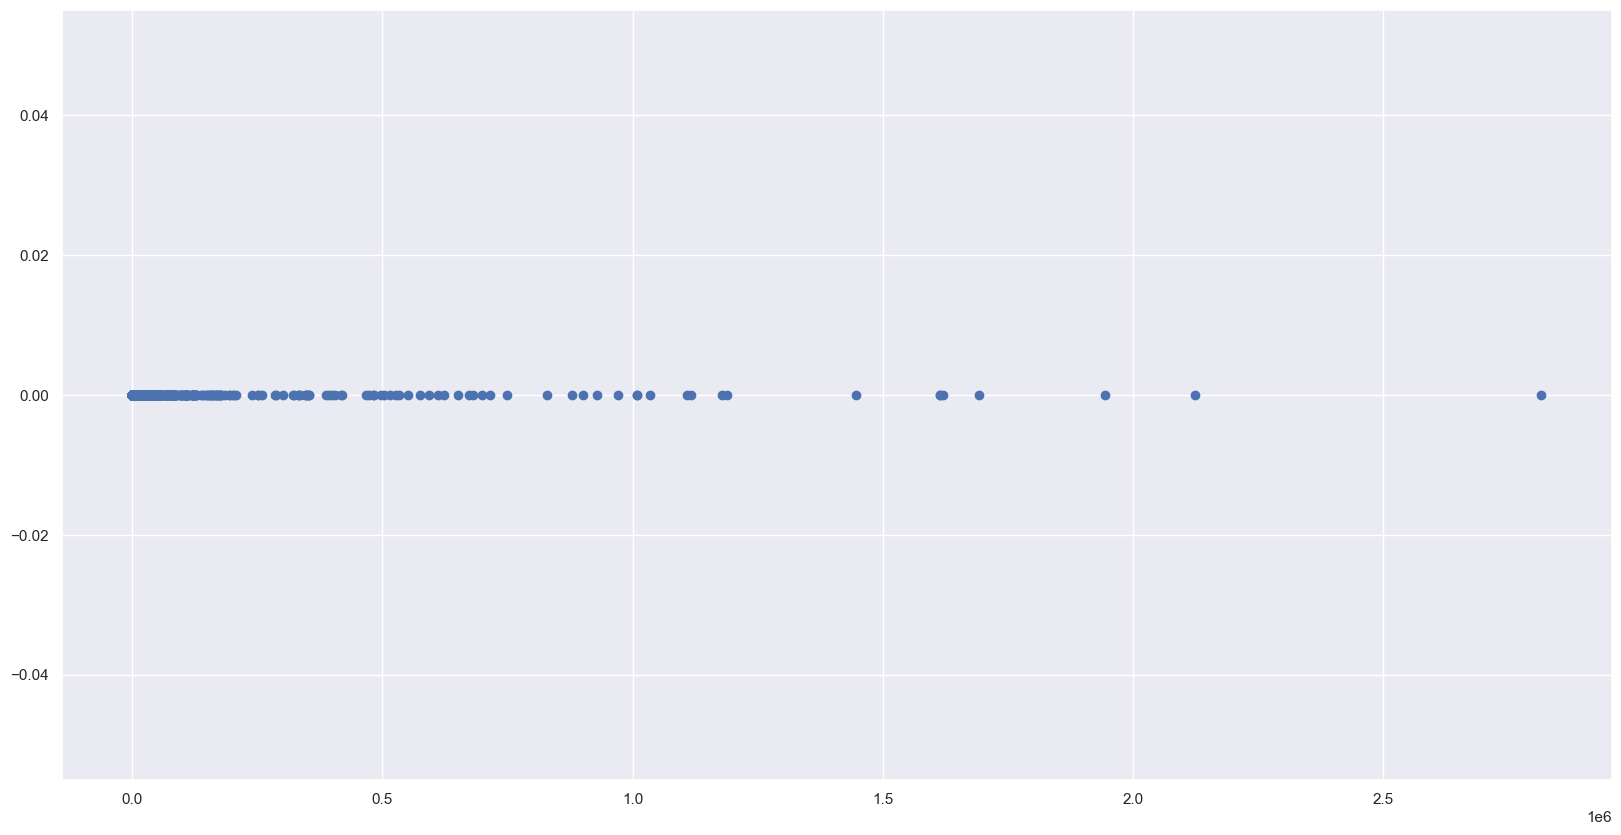

In [38]:
inform = train_data_df["MTO_PIA"]
plt.scatter(inform, np.zeros_like(inform), marker='o')
plt.show()

¿Que variables influencian el monto de gasto?

In [42]:
results_df = train_data_df.groupby('ESPECIFICA_DET', as_index=False)['MTO_PIA'].sum()
results_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')

,ESPECIFICA_DET,MTO_PIA
48,"3.LIBROS, DIARIOS, REVISTAS Y OTROS BIENES IMPRESOS NO VINCULADOS A ENSEÑANZA",940
70,99.OTROS PRODUCTOS SIMILARES,2460
34,2.GASTOS NOTARIALES,6027
35,2.MEDICAMENTOS,6262
28,10.SUBVENCION ADICIONAL DE PRACTICAS PROFESIONALES,6756
72,99.OTROS SERVICIOS FINANCIEROS,6939
62,8.CONTRIBUCIONES A LOS SEGUROS DE SALUD,7513
54,4.DE MAQUINARIAS Y EQUIPOS,16800
21,1.REPUESTOS Y ACCESORIOS,17534
8,1.DE MOBILIARIO Y SIMILARES,18236
